# MUSIC REPRESENTATIONS #
Hey! Let us dive into the music world. After reading the first chapter from the book - **Fundamentals Of Music Processing by Meinard Müller**, it is now time to start implementing the knowledge that you have gained from the book. 



## Notes & Pitch ##

## Question 1 ##

Complete the code for the following function which generates an array of sinusoids for a given list of MIDI pitches and also generates values on time axis in the form of time array. Recall that the MIDI note number is an integer between 0 and 127. MIDI note numbers encode, in increasing order, the musical pitches C0 to G#9. For example, note C4 has the MIDI note number 60, whereas the concert pitch A4 has the MIDI note number 69.

PS- I have used **IPython.display** library as written below, Your task is to find out its function and then comment it down in the code. 


In [279]:
import numpy as np
import IPython.display as ipd #Write down its function- This library is used to display image and videos in notebook
def create_sinusoid(pitches ,Sampling_rate,duration ,amplitude):# set their default values
    """
    Input:
        pitches (list): List of MIDI pitches 
        Duration (in seconds): of each sinusoid 
    Returns:
        x (np.ndarray): Signal
        t (np.ndarray): Time axis (in seconds)
    """
    
    ## COMPLETE THE CODE
    
    t=np.linspace(0,duration, int(duration*Sampling_rate), endpoint=False)
    x=0
    xt=np.array([0])
    for i in range(len(pitches)):
        x=amplitude*np.sin(2*np.pi*pitches[i]*t)
        xt=np.append(xt,x)
    return xt,t


### Section 1.1 ###

In [280]:

duration = 1   # Set the values on your own so that you get a fascinating ouput
amplitude = 5
Sampling_rate = 45100
pitches = [55,110,220,440,880,1760,3520]  # Set the values for [A1,A2,A3,A4,A5,A6,A7]  # Can reset the values to check results for other pitches.
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))# Don't use headphone for this

### Section 1.2 ###


![](g_major_scale.png)
<img src= "g_major_scale.png" width= "350"/> 


In order to describe music using a finite number of symbols, one needs to discretize the space of all possible pitches. This leads to the notion of a musical scale, which can be thought of as a finite set of representative pitches.
Generate G major and G minor scale using the above **create_sinusoid** function.

In [281]:
#Section 1.2 code
# G major
pitches=[392,415.30,493.88,523.25,587.33,659.25,739.99,783.99]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))
# G minor
pitches=[392.00,440.00,466.16,523.25,587.33,622.25,698.46,783.99]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

### Section 1.3 ###
### "HAPPY BIRTHDAYY TO YOUUU...HAPPYY BIRTHDAYYY TOO YOUUU.........." ###

We always wanted to sing **Happy Birthday** song on our parents', friends' birthday events. Guess what? Now you can definitely do that - without using guitar/piano/any instrument - no matter how ugly you sing - by just writing a few lines of code. Well, you will definitely become a rockstart if you are able to do this...
Hint : Use the same function as above, and you will succeed. 

PS - Those who have not played any musical instrument before should search for the paino notes of the **Happy Birthday** song..


In [268]:
# Section 1.3 code
# Happy Birtday 
pitches=[392.00,392.00,440.00,392.00,523.25,587.33,392.00,392.00,440.00,392.00,587.33,523.25]
x,t = create_sinusoid(pitches,Sampling_rate,duration,amplitude)
ipd.display(ipd.Audio(data=x, rate=Sampling_rate))

(586301,)


## Piano Roll Representation ##
As defined in the book, a piano-roll representation is understood to be a geometric visualization of the note information as specified by a piano roll. The horizontal axis of this two-dimensional representation encodes time, whereas the vertical axis encodes pitch. Every note is described by an axis-parallel rectangle coding three parameters. The first parameter is the onset time, given by the leftmost horizontal coordinate of the rectangle, and the second is the pitch, given by the lower vertical coordinate of the rectangle. Finally, the third parameter is the duration of the note, encoded by the width of the rectangle.

The major task of our project is to be successfully able to pre-process the audio file containing instrumental music and create transcription for the same. Now, Piano roll representation is a very important form of music representation which you must have studied from the book. 
In order to help you get a visualization for the same, here is a video clipping which will help you realise how beautiful this representation is. 


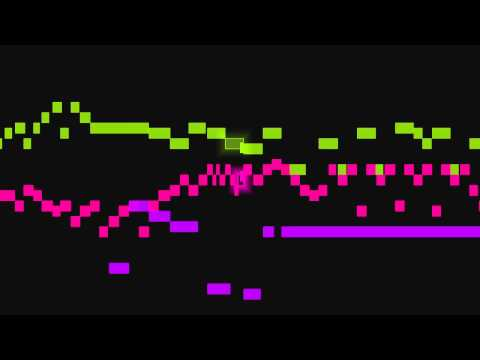

In [274]:
ipd.display(ipd.YouTubeVideo('ddbxFi3-UO4', start=1))

As you can see from the above video, there are many instruments which are being played at the same time - which are represented by different colors respectively. Such kind of music is called **POLYPHONIC**. It becomes difficult to do automatic transcription of this music type since it is hard to keep track of which note was played by which instrument. This is one of the major challenges that we will have to see during the implementation of our project.

## Question 2 ##

In the given CSV file, each note event corresponds to a line encoding a data record consisting of the four parameters start, duration, pitch, velocity, and label. The first four parameters are real numbers and encode the start, duration, pitch (encoded as MIDI note number), and velocity (in the range between 0.0 and 1.0) of a note event. The last parameter label is a string that my encode further information such as the instrument (e.g. violin, guitar, flute), or some staff information (e.g. left/right hand for a piano score).



In [179]:
import csv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd

with open('MUSIC_notes.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        csv_str = file.read()
print(csv_str)

0.25,0.23,67,1,Right Hand
0.25,0.23,55,1,Right Hand
0.25,0.23,43,1,Left Hand
0.5,0.23,67,1,Right Hand
0.5,0.23,55,1,Right Hand
0.5,0.23,43,1,Left Hand
0.75,0.23,67,1,Right Hand
0.75,0.23,55,1,Right Hand
0.75,0.23,43,1,Left Hand
1,0.97,63,1,Right Hand
1,0.97,51,1,Right Hand
1,0.97,39,1,Left Hand
2.25,0.23,65,1,Right Hand
2.25,0.23,53,1,Right Hand
2.25,0.23,41,1,Left Hand
2.5,0.23,65,1,Right Hand
2.5,0.23,53,1,Right Hand
2.5,0.23,41,1,Left Hand
2.75,0.23,65,1,Right Hand
2.75,0.23,53,1,Right Hand
2.75,0.23,41,1,Left Hand
3,1.97,62,1,Right Hand
3,1.97,50,1,Left Hand
3,1.97,38,1,Left Hand



The note events stored in the CSV file can be visualized using a **piano-roll representation**. Complete the following function to illustrate how this may be done.

You can use Pandas library for better visualization. You are free to use as many libraries as you want. You might not be aware of powers of python which you will might have to use to do this question, but you can always google and learn them as per your requirements. :)

The final output should look like this :
    

<img src="piano.png" width="600"/>


    Start  Duration  Pitch  Velocity       Label
0    0.25      0.23     67         1  Right Hand
1    0.25      0.23     55         1  Right Hand
2    0.25      0.23     43         1   Left Hand
3    0.50      0.23     67         1  Right Hand
4    0.50      0.23     55         1  Right Hand
5    0.50      0.23     43         1   Left Hand
6    0.75      0.23     67         1  Right Hand
7    0.75      0.23     55         1  Right Hand
8    0.75      0.23     43         1   Left Hand
9    1.00      0.97     63         1  Right Hand
10   1.00      0.97     51         1  Right Hand
11   1.00      0.97     39         1   Left Hand
12   2.25      0.23     65         1  Right Hand
13   2.25      0.23     53         1  Right Hand
14   2.25      0.23     41         1   Left Hand
15   2.50      0.23     65         1  Right Hand
16   2.50      0.23     53         1  Right Hand
17   2.50      0.23     41         1   Left Hand
18   2.75      0.23     65         1  Right Hand
19   2.75      0.23 

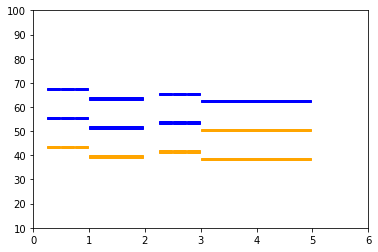

0.25


In [187]:
import pandas as pd
def convert_to_piano_roll():
    # complete the function
    harsit= pd.read_csv('MUSIC_notes.csv')
    print(harsit)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(24):
        if harsit['Label'][i]=='Right Hand':
            rect=matplotlib.patches.Rectangle((harsit['Start'][i],harsit['Pitch'][i]),harsit['Duration'][i], 1,color ='blue')
            ax.add_patch(rect)
        else:
            rect=matplotlib.patches.Rectangle((harsit['Start'][i],harsit['Pitch'][i]),harsit['Duration'][i], 1,color ='orange')
            ax.add_patch(rect)
    plt.xlim(0, 6)
    plt.ylim([10, 100])
    
    plt.show()
    # You can create more functions, if you need to.
    print(harsit["Start"][0]) 
convert_to_piano_roll()

    

## PrettyMIDI ##

MIDI is another important music transcription. **[PrettyMIDI](https://github.com/craffel/pretty-midi)** is an important Python library for MIDI visualization, manipulation and interpretation. Read more about this library since it will be very useful for our project. 


## Question 3 ##

Download any MIDI file from the internet and copy it to the same directory as that of this notebook. 
Dig deeper into PrettyMIDI and try to visualise the MIDI file in a form of table consisting of easy to understand notes events. Basically, you will have to convert the standard MIDI data into a standard python list using PrettyMIDI and display the events in the form of table with each event described by the parameters : Start, End, Pitch, Velocity and the Instrument. You can show the final output using Pandas Dataframe as well. 


There are 1 time signature changes
There are 3 instruments
Instrument 1 has 102 notes
Instrument 2 has 103 notes
Instrument 3 has 261 notes
The 1st Instrument
         start        end  pitch  velocity
0     1.384614   2.192305     31       110
1     2.307690   2.692305     35       110
2     2.769228   3.576919     38       110
3     4.153842   4.538457     38       110
4     4.615380   4.999995     40       110
..         ...        ...    ...       ...
97   48.391281  48.724614     31       110
98   48.791281  49.124614     38       110
99   49.191281  49.524614     48       110
100  49.591281  49.924614     43       110
101  49.991281  50.691281     36       110

[102 rows x 4 columns]
The 2nd Instrument
         start        end  pitch  velocity
0     1.384614   2.192305     31       110
1     2.307690   2.692305     35       110
2     2.769228   3.576919     38       110
3     4.153842   4.538457     38       110
4     4.615380   4.999995     40       110
..         ...        ..

/Users/harsitsinha/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:1335: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(


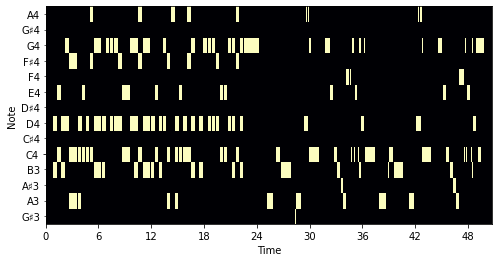

In [277]:
## QUESTION 3 IS SUPPOSED TO BE DONE HERE

from __future__ import print_function

import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
pm = pretty_midi.PrettyMIDI('HappyBirthday.mid')
print('There are {} time signature changes'.format(len(pm.time_signature_changes)))
print('There are {} instruments'.format(len(pm.instruments)))
print('Instrument 1 has {} notes'.format(len(pm.instruments[0].notes)))
print('Instrument 2 has {} notes'.format(len(pm.instruments[1].notes)))
print('Instrument 3 has {} notes'.format(len(pm.instruments[2].notes)))
print("The 1st Instrument")

thisdict = {
  "start": [],
  "end": [],
  "pitch": [],
  "velocity": []
} 

for i in range(len(pm.instruments[0].notes)):
    thisdict["start"].append(pm.instruments[0].notes[i].start)
    thisdict["end"].append(pm.instruments[0].notes[i].end)
    thisdict["pitch"].append(pm.instruments[0].notes[i].pitch)
    thisdict["velocity"].append(pm.instruments[0].notes[i].velocity)
df = pd.DataFrame(thisdict)
print(df)
print("The 2nd Instrument")
for i in range(len(pm.instruments[1].notes)):
    thisdict["start"].append(pm.instruments[1].notes[i].start)
    thisdict["end"].append(pm.instruments[1].notes[i].end)
    thisdict["pitch"].append(pm.instruments[1].notes[i].pitch)
    thisdict["velocity"].append(pm.instruments[1].notes[i].velocity)
df = pd.DataFrame(thisdict)
print(df)
print("The 3nd Instrument")
for i in range(len(pm.instruments[2].notes)):
    thisdict["start"].append(pm.instruments[2].notes[i].start)
    thisdict["end"].append(pm.instruments[2].notes[i].end)
    thisdict["pitch"].append(pm.instruments[2].notes[i].pitch)
    thisdict["velocity"].append(pm.instruments[2].notes[i].velocity)
df = pd.DataFrame(thisdict)
print(df)
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 56, 70)

These questions might be difficult for you, considering you have no Python experience. But it is the time to finally learn this language properly. You do not need to do brain storming in any question since these questions demand simple implementation of whatever you have learnt in the chapter 1 of music representations. 
So, with little efforts, you can easily solve the assignment. ALL THE BEST!
In case you have any doubts, feel free to discuss on Discord channel. 